In [24]:
#PROV tutorial: https://nbviewer.jupyter.org/github/trungdong/notebooks/blob/master/PROV%20Tutorial.ipynb
#PROV model package: https://prov.readthedocs.io/en/latest/readme.html

In [11]:
from prov.model import ProvDocument

In [12]:
# Create a new provenance document
d1 = ProvDocument()  # d1 is now an empty provenance document

In [13]:
# Declaring namespaces for various prefixes used in the example
d1.add_namespace('now', 'http://www.provbook.org/nownews/')
d1.add_namespace('nowpeople', 'http://www.provbook.org/nownews/people/')
d1.add_namespace('bk', 'http://www.provbook.org/ns/#')

<Namespace: bk {http://www.provbook.org/ns/#}>

In [14]:
# Entity: now:employment-article-v1.html
e1 = d1.entity('now:employment-article-v1.html')
# Agent: nowpeople:Bob
d1.agent('nowpeople:Bob')

<ProvAgent: nowpeople:Bob>

In [15]:
# Attributing the article to the agent
d1.wasAttributedTo(e1, 'nowpeople:Bob')

<ProvAttribution: (now:employment-article-v1.html, nowpeople:Bob)>

In [16]:
# What we have so far (in PROV-N)
print(d1.get_provn())

document
  prefix now <http://www.provbook.org/nownews/>
  prefix nowpeople <http://www.provbook.org/nownews/people/>
  prefix bk <http://www.provbook.org/ns/#>
  
  entity(now:employment-article-v1.html)
  agent(nowpeople:Bob)
  wasAttributedTo(now:employment-article-v1.html, nowpeople:Bob)
endDocument


In [17]:
# add more namespace declarations
d1.add_namespace('govftp', 'ftp://ftp.bls.gov/pub/special.requests/oes/')
d1.add_namespace('void', 'http://vocab.deri.ie/void#')

# 'now:employment-article-v1.html' was derived from at dataset at govftp
d1.entity('govftp:oesm11st.zip', {'prov:label': 'employment-stats-2011', 'prov:type': 'void:Dataset'})
d1.wasDerivedFrom('now:employment-article-v1.html', 'govftp:oesm11st.zip')

<ProvDerivation: (now:employment-article-v1.html, govftp:oesm11st.zip)>

In [18]:
print(d1.get_provn())

document
  prefix now <http://www.provbook.org/nownews/>
  prefix nowpeople <http://www.provbook.org/nownews/people/>
  prefix bk <http://www.provbook.org/ns/#>
  prefix govftp <ftp://ftp.bls.gov/pub/special.requests/oes/>
  prefix void <http://vocab.deri.ie/void#>
  
  entity(now:employment-article-v1.html)
  agent(nowpeople:Bob)
  wasAttributedTo(now:employment-article-v1.html, nowpeople:Bob)
  entity(govftp:oesm11st.zip, [prov:label="employment-stats-2011", prov:type="void:Dataset"])
  wasDerivedFrom(now:employment-article-v1.html, govftp:oesm11st.zip, -, -, -)
endDocument


In [19]:
# Adding an activity
d1.add_namespace('is', 'http://www.provbook.org/nownews/is/#')
d1.activity('is:writeArticle')

<ProvActivity: is:writeArticle>

In [20]:
# Usage and Generation
d1.used('is:writeArticle', 'govftp:oesm11st.zip')
d1.wasGeneratedBy('now:employment-article-v1.html', 'is:writeArticle')

<ProvGeneration: (now:employment-article-v1.html, is:writeArticle)>

In [21]:
# visualize the graph
from prov.dot import prov_to_dot
dot = prov_to_dot(d1)
dot.write_png('article-prov.png')

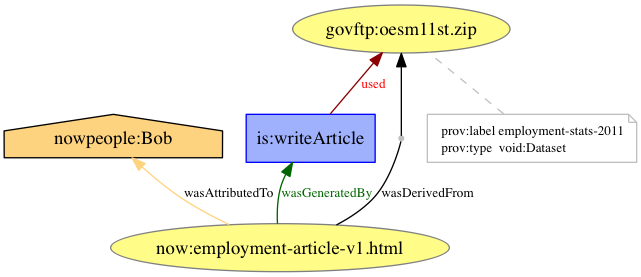

In [22]:
from IPython.display import Image
Image('article-prov.png')

In [23]:
# Or save to a PDF
dot.write_pdf('article-prov.pdf')

In [25]:
#JSON support
print(d1.serialize(indent=2))

{
  "prefix": {
    "now": "http://www.provbook.org/nownews/",
    "nowpeople": "http://www.provbook.org/nownews/people/",
    "bk": "http://www.provbook.org/ns/#",
    "govftp": "ftp://ftp.bls.gov/pub/special.requests/oes/",
    "void": "http://vocab.deri.ie/void#",
    "is": "http://www.provbook.org/nownews/is/#"
  },
  "entity": {
    "now:employment-article-v1.html": {},
    "govftp:oesm11st.zip": {
      "prov:label": "employment-stats-2011",
      "prov:type": "void:Dataset"
    }
  },
  "agent": {
    "nowpeople:Bob": {}
  },
  "wasAttributedTo": {
    "_:id1": {
      "prov:entity": "now:employment-article-v1.html",
      "prov:agent": "nowpeople:Bob"
    }
  },
  "wasDerivedFrom": {
    "_:id2": {
      "prov:generatedEntity": "now:employment-article-v1.html",
      "prov:usedEntity": "govftp:oesm11st.zip"
    }
  },
  "activity": {
    "is:writeArticle": {}
  },
  "used": {
    "_:id3": {
      "prov:activity": "is:writeArticle",
      "prov:entity": "govftp:oesm11st.zip"
   

In [26]:
d1.serialize('article-prov.json')

In [27]:
#XML and RDF support
d1.serialize('article-prov.xml', format='xml')

In [28]:
d1.serialize('article-prov.ttl', format='rdf', rdf_format='ttl')